<a href="https://colab.research.google.com/github/Saurav-Somani/SNA-Project/blob/Round-2/SNA_Round_2_ICM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creating scale free network**

In [9]:
from networkx import *
import matplotlib.pyplot as plt
import math
import itertools
from queue import Queue
import numpy as np
import numpy.random
import pylab
import random

g = barabasi_albert_graph(10000, 250)


set_edge_attributes(g, values=0, name='weight')
arr = [[False] * 10000 for i in range(10000)]
vis = set()
q = Queue()
vis.add(0)
q.put(0)

while not q.empty():
    u = q.get()

    vis.add(u)
    x = 1
    f = 0

    for v in g.neighbors(u):
        if v not in vis:
            vis.add(v)
            q.put(v)

        if arr[u][v] is True or arr[v][u] is True:
            x -= g[u][v]['weight']
        else:
            f += 1

    k = 0
    lst = np.random.dirichlet(np.ones(f), size=1).tolist()[0]

    for v in g.neighbors(u):
        if arr[u][v] is False or arr[v][u] is False:
            arr[u][v] = arr[v][u] = True
            g[u][v]['weight'] = lst[k] * max(x, 0)
            k += 1




nodes =[]
num_steps = []

for itr in range(0, 10):
    r = random.randint(0, 10000)
    vis = set()
    q = Queue()
    q.put(r)
    activated = []
    activated.append(r)
    steps = 0
    print("Initial set - " + str(activated))

    while not q.empty():
        steps += 1
        u = q.get()

        for v in g.neighbors(u):
            if v not in activated:
                rand = random.uniform(0, 1)
                if rand < g[u][v]['weight']:
                    q.put(v)
                    activated.append(v)

    print("Steps - " + str(steps))
    print("Activated nodes - " + str(activated))
    num_steps.append(steps)
    nodes.append(len(activated))
    print()

    
print("The average number of steps are" , sum(num_steps)/10)


Initial set - [7048]
Steps - 61
Activated nodes - [7048, 5148, 3965, 328, 6734, 2974, 13, 2117, 6037, 2284, 9532, 1381, 730, 7624, 9917, 7784, 43, 2758, 7293, 6346, 418, 4680, 6365, 1591, 6488, 6842, 2579, 2324, 4370, 6835, 4477, 8637, 9562, 4620, 2858, 7209, 5694, 6294, 1805, 5678, 285, 3771, 1372, 2963, 611, 954, 1231, 9591, 4647, 7240, 5299, 2900, 7935, 1646, 2292, 5770, 7783, 7296, 4064, 5906, 5551]

Initial set - [9598]
Steps - 2
Activated nodes - [9598, 4336]

Initial set - [7279]
Steps - 2
Activated nodes - [7279, 4390]

Initial set - [8063]
Steps - 6
Activated nodes - [8063, 3118, 4940, 8098, 9440, 5630]

Initial set - [9545]
Steps - 40
Activated nodes - [9545, 6722, 632, 3551, 5272, 8801, 811, 401, 9491, 4624, 113, 4563, 656, 4946, 478, 4264, 4265, 2645, 9621, 1168, 6760, 9033, 5890, 8852, 2157, 4858, 3973, 2482, 6198, 482, 7515, 7997, 2559, 144, 8045, 3782, 1933, 8720, 3319, 4782]

Initial set - [8080]
Steps - 4
Activated nodes - [8080, 9809, 7202, 7376]

Initial set - [6026]

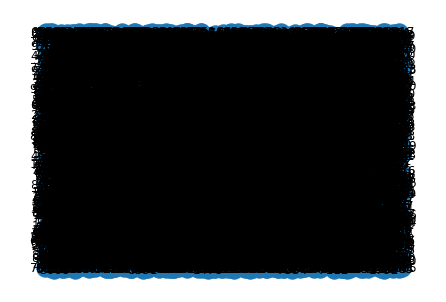

In [ ]:
draw_random(g, with_labels = True)
plt.savefig("fig1.png")